In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
import seaborn as sns
import numpy as np
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

from sklearn. model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import tensorflow_datasets as tfds

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# reading csv files
from google.colab import files
uploaded = files.upload()

Saving bbc.csv to bbc.csv


In [ ]:
df=pd.read_csv('bbc.csv')

In [ ]:
df

,Unnamed: 0,Article,Class
0,0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,3,High fuel prices hit BA's profits\n\nBritish A...,business
4,4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...,...
1907,1907,BT program to beat dialler scams\n\nBT is intr...,tech
1908,1908,Spam e-mails tempt net shoppers\n\nComputer us...,tech
1909,1909,Be careful how you code\n\nA new European dire...,tech
1910,1910,US cyber security chief resigns\n\nThe man mak...,tech


In [ ]:
print('SHAPE OF DATASET: ', df.shape,'\n\nCOLUMNS IN DATASET: ', df.columns, 'OUTPUT CLASSES:', df.Class.unique())

SHAPE OF DATASET:  (1912, 3) 

COLUMNS IN DATASET:  Index(['Unnamed: 0', 'Article', 'Class'], dtype='object') OUTPUT CLASSES: ['business' 'entertainment' 'politics' 'sport' 'tech']


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Article       0
Class         0
dtype: int64

NUMBER OF SAMPLES IN EACH CATEGORY: 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


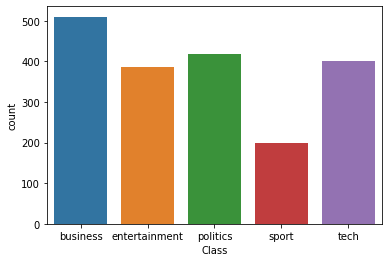

In [ ]:
print('NUMBER OF SAMPLES IN EACH CATEGORY: \n')
sns.countplot(df.Class)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1912 non-null   int64 
 1   Article     1912 non-null   object
 2   Class       1912 non-null   object
dtypes: int64(1), object(2)
memory usage: 44.9+ KB


**ASSIGNING Y PART (CLASS) A CATEGORICAL CODE**

In [ ]:
df['Class']=df['Class'].astype('category')

In [ ]:
df['Class']=df['Class'].cat.codes

**SEGREGATING X AND Y**

In [ ]:
df_x=df['Article']
df_y=df['Class']

**PREPROCESSING THE X PART (ARTICLE)**

In [ ]:
p_train_x=[]
t=[]
lem=WordNetLemmatizer()
print("Data Cleaning in Progress: 1. Unwanted Character Removal 2. Lowercasing 3.Tokenization 4. Stop word Removal 5. Lemmatization")
for i in range(len(df_x)):
 #print("\nBefore Processing:", df_x[i]) 
 wo=re.sub('[^a-zA-Z]',' ',df_x[i]) # replace the unwanted characters by space before word_tokenize
 wo=wo.lower()  # lowercasing 
 #print("After Removing Characters:", wo)
 wo=nltk.word_tokenize(wo) 
 wo=[w for w in wo if w not in set (stopwords.words('english'))]
 #print("After Removing Stop words:",wo)
 wl=[]
 for w in wo:
   wl.append(lem.lemmatize(w))
 t=' '.join(wl)
 p_train_x.append(t)
print("Data Cleaning Completed")

Data Cleaning in Progress: 1. Unwanted Character Removal 2. Lowercasing 3.Tokenization 4. Stop word Removal 5. Lemmatization
Data Cleaning Completed


**BUILDING THE CORPUS AND VOCABULARY SET FROM X PART**

In [ ]:
corpus=[]
for i in range (len(p_train_x)):
  words= nltk.word_tokenize(p_train_x[i]) # tokenize to get the words in ith paragraph 
  for w in words:
    corpus.append(w)
#print(corpus)

# vocabulary of distinct words from corpus
vocabulary_set= set() 
vocabulary_set.update(corpus)
#print("Corpus Vocabulary:", vocabulary_set)

In [ ]:
vocabulary_set.discard(' ')
vocabulary_set.discard('   ')
print(vocabulary_set)

{'dollar', 'wellbutrin', 'reshape', 'stevens', 'flagrant', 'unabated', 'mortgage', 'overwhelming', 'goyal', 'moniker', 'juan', 'statuette', 'surrendering', 'sarcastically', 'liquidation', 'highlander', 'coding', 'cull', 'jolene', 'ubiquitously', 'alcock', 'gosaibi', 'stead', 'enfance', 'triumphed', 'feel', 'occur', 'fisherman', 'parker', 'warp', 'jakamoko', 'intercepted', 'stored', 'slice', 'embodiment', 'airy', 'cumbria', 'preserving', 'saakashvili', 'ofcom', 'dec', 'true', 'ligament', 'index', 'uhi', 'hollyoaks', 'sextant', 'futurelab', 'postponed', 'five', 'electrifying', 'durham', 'responsibilty', 'duty', 'newer', 'pop', 'section', 'bigot', 'mblox', 'magnetic', 'phenomenally', 'subversive', 'compressed', 'relate', 'voting', 'paternity', 'point', 'videophones', 'normally', 'organizing', 'espanol', 'logistics', 'barstow', 'rapper', 'aunt', 'injured', 'rubens', 'trek', 'balado', 'organism', 'bangkok', 'task', 'sylvester', 'administrator', 'possession', 'dagblad', 'arabia', 'gilles', '

**TRAIN-VALIDATION-TEST SPLIT (70:10:20) & DISTRIBUTION**

In [ ]:
X_train, X_rem, Y_train, Y_rem= train_test_split(p_train_x,df_y,test_size=0.3, random_state=2)  

In [ ]:
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.66)

In [ ]:
from collections import Counter
print("Train Data Length:", len(X_train))
print("Class Distribution:", Counter(Y_train))
print("Validation Data Length:", len(X_valid))
print("Class Distribution:", Counter(Y_valid))
print("Test Data Length:", len(X_test))
print("Class Distribution:", Counter(Y_test))

Train Data Length: 1338
Class Distribution: Counter({0: 351, 2: 293, 1: 276, 4: 274, 3: 144})
Validation Data Length: 195
Class Distribution: Counter({4: 51, 0: 48, 1: 39, 2: 39, 3: 18})
Test Data Length: 379
Class Distribution: Counter({0: 111, 2: 85, 4: 76, 1: 71, 3: 36})


**CONVERTING Y PARTS TO CATEGORICAL**

In [ ]:
Y_train_cat=to_categorical(Y_train)
Y_valid_cat=to_categorical(Y_valid)
Y_test_cat=to_categorical(Y_test)

**ENCODER TO ENCODE THE X PARTS**

In [ ]:
encoder= tfds.deprecated.text.TokenTextEncoder(vocabulary_set)

In [ ]:
encoded_train_news=[]
for i in range(len(X_train)):       
  encoded_train_news.append(encoder.encode(X_train[i]))           
  
encoded_valid_news=[]
for i in range(len(X_valid)):    
  encoded_valid_news.append(encoder.encode(X_valid[i]))         

encoded_test_news=[]
for i in range(len(X_test)):     
  encoded_test_news.append(encoder.encode(X_test[i]))

**INITIALIZING THE CONSTANTS**

In [ ]:
vocab_size=len(vocabulary_set)+1
max_length=300

**PAD X TO EQUAL SIZES**

In [ ]:
from keras.preprocessing.sequence import pad_sequences
padded_encoded_train_news=pad_sequences(encoded_train_news, maxlen=max_length, padding='post')
padded_encoded_valid_news=pad_sequences(encoded_valid_news, maxlen=max_length, padding='post')
padded_encoded_test_news=pad_sequences(encoded_test_news, maxlen=max_length, padding='post')

**PROPOSE MODEL**

In [ ]:
def build_model():
  model = Sequential()
  model.add(Embedding(vocab_size,256, input_length=max_length))
  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(5, activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
model=build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 256)          5899520   
                                                                 
 flatten (Flatten)           (None, 76800)             0         
                                                                 
 dense (Dense)               (None, 32)                2457632   
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 5)                 85        
                                                                 
Total params: 8,357,765
Trainable params: 8,357,765
Non-trainable params: 0
_________________________________________________________________


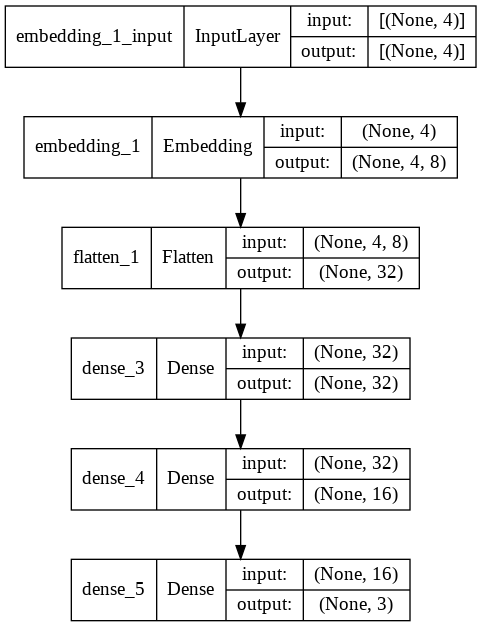

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

**FIT TRAIN DATA**

In [ ]:
h1=model.fit(padded_encoded_train_news, Y_train_cat, epochs=5)

Epoch 1/5
42/42 [==============================] - 5s 99ms/step - loss: 1.4568 - accuracy: 0.3326
Epoch 2/5
42/42 [==============================] - 4s 97ms/step - loss: 0.7956 - accuracy: 0.7182
Epoch 3/5
42/42 [==============================] - 5s 127ms/step - loss: 0.2319 - accuracy: 0.9208
Epoch 4/5
42/42 [==============================] - 5s 118ms/step - loss: 0.0325 - accuracy: 0.9978
Epoch 5/5
42/42 [==============================] - 5s 112ms/step - loss: 0.0057 - accuracy: 1.0000


In [ ]:
pd.DataFrame(h1.history)

,loss,accuracy
0,1.456812,0.332586
1,0.795619,0.718236
2,0.231897,0.920777
3,0.032480,0.997758
4,0.005680,1.000000


**FIT VALIDATION DATA**

In [ ]:
h2=model.fit(padded_encoded_valid_news, Y_valid_cat, epochs=5)

Epoch 1/5
7/7 [==============================] - 1s 137ms/step - loss: 0.1353 - accuracy: 0.9487
Epoch 2/5
7/7 [==============================] - 1s 125ms/step - loss: 0.0224 - accuracy: 1.0000
Epoch 3/5
7/7 [==============================] - 1s 96ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 4/5
7/7 [==============================] - 1s 138ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 1s 138ms/step - loss: 0.0021 - accuracy: 1.0000


In [ ]:
pd.DataFrame(h2.history)

,loss,accuracy
0,0.135311,0.948718
1,0.022385,1.000000
2,0.005713,1.000000
3,0.003701,1.000000
4,0.002082,1.000000


**EVALUATING TEST ACCURACY & PREDICTIONS**

In [ ]:
model.evaluate(padded_encoded_test_news,Y_test_cat)

12/12 [==============================] - 0s 12ms/step - loss: 0.2136 - accuracy: 0.9499


[0.21358810365200043, 0.9498680830001831]

In [ ]:
predictions= model.predict(padded_encoded_test_news)
yhat= np.round(predictions)
yhat

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

**COMPLETE CLASSIFICATION REPORT**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_cat, yhat))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       111
           1       0.95      0.97      0.96        71
           2       0.95      0.95      0.95        85
           3       1.00      0.89      0.94        36
           4       0.96      0.89      0.93        76

   micro avg       0.96      0.94      0.95       379
   macro avg       0.96      0.94      0.95       379
weighted avg       0.96      0.94      0.95       379
 samples avg       0.94      0.94      0.94       379



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
